In [852]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

## Calculando valores promedio y desviacion estandar

In [853]:
dataArray = [
    "numeros_aleatorios_100.csv",
    "numeros_aleatorios_1000.csv",
    "numeros_aleatorios_2000.csv",
    "numeros_aleatorios_3000.csv",
    "numeros_aleatorios_4000.csv",
    "numeros_aleatorios_5000.csv",
    "numeros_aleatorios_6000.csv",
    "numeros_aleatorios_7000.csv",
    "numeros_aleatorios_8000.csv",
    "numeros_aleatorios_9000.csv",
    "numeros_aleatorios_10000.csv",
    "numeros_aleatorios_20000.csv",
    "numeros_aleatorios_30000.csv",
    "numeros_aleatorios_40000.csv",
    "numeros_aleatorios_50000.csv",
]

algorithmsList = [
    "bubbleSort",
    "insertionSort",
    "mergeSort",
    "quickSort",
    "bucketSort",
    "countingSort",
]

languages = ["cpp", "go", "python"]

Calculando los valores promedios.

In [854]:
for language in languages:
    registros=[]
    for i in range(1, 6):
        fileName='./results/'+language+'/record'+str(i)+'.json'
        with open(fileName) as json_file:
            registros.append(json.load(json_file))

    averages = {}

    for dataset, value in registros[0].items():
        averages[dataset] = {}
        for algoritmo in value.keys():
            tiempos=[registro[dataset][algoritmo] for registro in registros]
            averages[dataset][algoritmo] = sum(tiempos)/len(tiempos)

    with open("./average/"+language+".json", "w") as file:
        json.dump(averages, file, indent=4)

    valoresStadisticos={}

    for dataset, value in registros[0].items():
        valoresStadisticos[dataset] = {}
        for algoritmo in value.keys():
            tiempos=[registro[dataset][algoritmo] for registro in registros]
            valoresStadisticos[dataset][algoritmo] = {
                'mean': np.mean(tiempos),
                'median': np.median(tiempos),
                'stdev': np.std(tiempos),
                'variance': np.var(tiempos)
            }
    with open("./statistics/"+language+".json", "w") as file:
        json.dump(valoresStadisticos, file, indent=4)




Comparativa de los tiempos de ejecución en cada lenguaje de programación(para cambiar el lenguaje a analizar, cambiar la variable "language" por "cpp" para analizar C++, "go" para analizar Go y "python" para analizar Python).

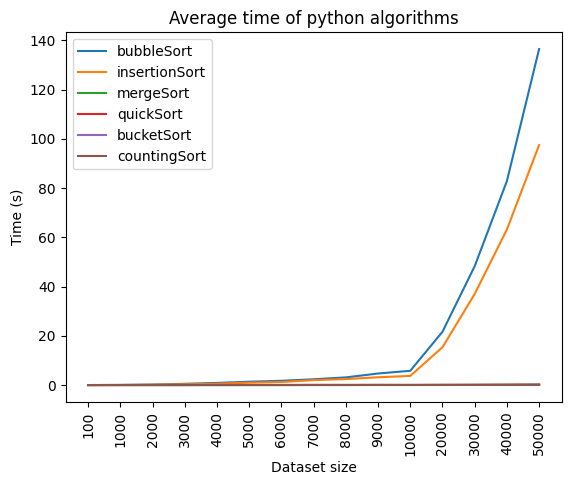

In [855]:
language = "python"

fileName = "./average/" + language + ".json"

with open(fileName) as json_file:
    averagePerLanguage = json.load(json_file)

averagePerLanguage = dict(
    sorted(
        averagePerLanguage.items(), key=lambda x: int(x[0].split("_")[2].split(".")[0])
    )
)

fig = plt.figure()

for alg in algorithmsList:
    x = []
    y = []
    for dataset, times in averagePerLanguage.items():
        x.append(dataset.split("_")[2].split(".")[0])
        y.append(times[alg])
    plt.plot(x, y, label=alg)

plt.xticks(rotation=90)
plt.xlabel("Dataset size")
plt.ylabel("Time (s)")
plt.legend()
plt.title("Average time of " + language + " algorithms")
plt.show()

In [856]:
pd.DataFrame(averagePerLanguage).transpose()

bubbleSort  insertionSort  mergeSort  quickSort  \
numeros_aleatorios_100.csv      0.000390       0.000296   0.000142   0.000150   
numeros_aleatorios_1000.csv     0.053639       0.038037   0.002206   0.002222   
numeros_aleatorios_2000.csv     0.189885       0.135957   0.003895   0.005863   
numeros_aleatorios_3000.csv     0.502390       0.319598   0.006705   0.007901   
numeros_aleatorios_4000.csv     0.862074       0.523450   0.010252   0.016604   
numeros_aleatorios_5000.csv     1.355364       0.964032   0.015334   0.024580   
numeros_aleatorios_6000.csv     1.729516       1.225119   0.015703   0.019823   
numeros_aleatorios_7000.csv     2.341470       1.996882   0.029774   0.035124   
numeros_aleatorios_8000.csv     3.107798       2.421975   0.024903   0.027975   
numeros_aleatorios_9000.csv     4.688532       3.162779   0.037562   0.043156   
numeros_aleatorios_10000.csv    5.787915       3.708215   0.031338   0.035719   
numeros_aleatorios_20000.csv   21.649661      15.359953   0.055533   0.053301   
numeros_aleatorios_30000.csv   48.276693      36.990495   0.078214   0.077808   
numeros_aleatorios_40000.csv   82.857628      63.181549   0.111415   0.115262   
numeros_aleatorios_50000.csv  136.471320      97.478564   0.158458   0.158542   

                              bucketSort  countingSort  
numeros_aleatorios_100.csv      0.000082      0.000135  
numeros_aleatorios_1000.csv     0.003450      0.001454  
numeros_aleatorios_2000.csv     0.003355      0.003176  
numeros_aleatorios_3000.csv     0.004900      0.006108  
numeros_aleatorios_4000.csv     0.013541      0.012115  
numeros_aleatorios_5000.csv     0.007130      0.012303  
numeros_aleatorios_6000.csv     0.009177      0.010366  
numeros_aleatorios_7000.csv     0.017570      0.022518  
numeros_aleatorios_8000.csv     0.011500      0.018887  
numeros_aleatorios_9000.csv     0.019421      0.030541  
numeros_aleatorios_10000.csv    0.013304      0.020822  
numeros_aleatorios_20000.csv    0.024481      0.041071  
numeros_aleatorios_30000.csv    0.036997      0.044108  
numeros_aleatorios_40000.csv    0.055972      0.066096  
numeros_aleatorios_50000.csv    0.072944      0.079372

Comparando la velocidad de los tres lenguajes de programación con el dataset mas grande.

In [857]:
averages = {}
for l in languages:
    fileName = f"./average/{l}.json"
    with open(fileName) as json_file:
        averages[l]=json.load(json_file)


In [858]:
biggestDataSet=dataArray[-1]
# print(biggestDataSet)
averagesForBiggestDataSet={}
for l in languages:
    averagesForBiggestDataSet[l]={}
    for alg in algorithmsList:
        averagesForBiggestDataSet[l][alg]=averages[l][biggestDataSet][alg]

In [859]:
pd.DataFrame(averagesForBiggestDataSet).T

bubbleSort  insertionSort  mergeSort  quickSort  bucketSort  \
cpp      18.400998      10.769763   0.104209   0.114715    0.049197   
go        3.117542       0.721660   0.007712   0.023407    0.006846   
python  136.471320      97.478564   0.158458   0.158542    0.072944   

        countingSort  
cpp         0.008205  
go          0.004816  
python      0.079372

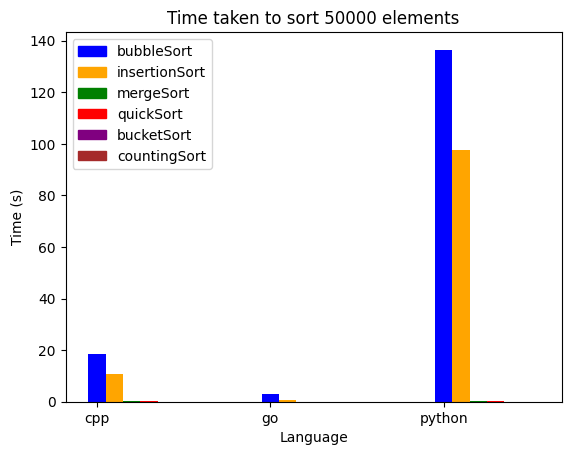

In [860]:
x = np.arange(len(languages))
width = 0.1
multiplier = 0

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

yValues = []

for e in algorithmsList:
    yValues.append([value[e] for key, value in averagesForBiggestDataSet.items()])

for i in range(len(yValues)):
    plt.bar(
        x + width * multiplier, yValues[i], width, label=yValues[i], color=colors[i]
    )
    multiplier += 1

plt.ylabel("Time (s)")
plt.xlabel("Language")
plt.xticks(x, languages)

customLegend = [None] * len(algorithmsList)
for i in range(len(algorithmsList)):
    customLegend[i]=mpatches.Patch(color=colors[i],label=algorithmsList[i])
plt.legend(handles=customLegend)
plt.title("Time taken to sort 50000 elements")


plt.show()

Pintando la tabla de promedios.

In [861]:
currentLanguage="cpp"
currentAlgorithm=algorithmsList[5]

results={}

for i in range(1,6):
    results[f"record{i}"]={}

for i in range(1,6):
    fileName = f"./results/{currentLanguage}/record{i}.json"
    with open(fileName) as json_file:
        results[f"record{i}"]=json.load(json_file)

resultsForDataset={}

for i in range(1,6):
    resultsForDataset[f"record{i}"]={}
    for key in results[f"record{i}"]:
        # if key == currentDataset:
        #     resultsForDataset[f"record{i}"][key]=results[f"record{i}"][key][currentAlgorithm]
        for d in dataArray:
            resultsForDataset[f"record{i}"][d.split('_')[2].split('.')[0]]=results[f"record{i}"][d][currentAlgorithm]

df=pd.DataFrame(resultsForDataset)

In [862]:
averagesToAdd = []
fileName = f"./average/{currentLanguage}.json"
with open(fileName) as json_file:
    data = json.load(json_file)
    data = dict(
        sorted(
            data.items(),
            key=lambda x: int(x[0].split("_")[2].split(".")[0]),
        )
    )
    for key, value in data.items():
        averagesToAdd.append(value[currentAlgorithm])
df.insert(5, "Average", averagesToAdd, True)

standardDeviationToAdd = []
fileName = f"./statistics/{currentLanguage}.json"
with open(fileName) as json_file:
    data = json.load(json_file)
    data = dict(
        sorted(
            data.items(),
            key=lambda x: int(x[0].split("_")[2].split(".")[0]),
        )
    )
    for key, value in data.items():
        standardDeviationToAdd.append(value[currentAlgorithm]["stdev"])
df.insert(6, "StDev", standardDeviationToAdd, True)
# agrega (s) a los titulos de las columnas
pd.options.display.float_format = "{:,.6f}".format

print(currentLanguage + " " + currentAlgorithm)
df

cpp countingSort


record1  record2  record3  record4  record5  Average    StDev
100   0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
1000  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
2000  0.000000 0.000000 0.001000 0.000000 0.000000 0.000200 0.000400
3000  0.000000 0.000000 0.000983 0.000996 0.001000 0.000596 0.000487
4000  0.000000 0.000000 0.001000 0.000990 0.000999 0.000598 0.000488
5000  0.001001 0.000997 0.000000 0.001007 0.000000 0.000601 0.000491
6000  0.001000 0.001000 0.002005 0.001004 0.001982 0.001398 0.000486
7000  0.000000 0.000999 0.001000 0.000999 0.000999 0.000799 0.000400
8000  0.001000 0.000999 0.002015 0.000999 0.000000 0.001003 0.000637
9000  0.000999 0.001003 0.000987 0.001996 0.000998 0.001197 0.000400
10000 0.001000 0.001002 0.000999 0.000992 0.001000 0.000999 0.000003
20000 0.002998 0.002000 0.003000 0.005003 0.002000 0.003000 0.001097
30000 0.003000 0.003000 0.002998 0.005995 0.002998 0.003598 0.001198
40000 0.003999 0.004000 0.004001 0.010015 0.007999 0.006003 0.002534
50000 0.007000 0.008001 0.007999 0.011021 0.007003 0.008205 0.001477